<center><h1>DSCI-552 HW6</h1></center>
<br>


### I Chen Yang
### GitHub ID:ichenyang
### 8260207588

In [166]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import variation
import math
from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
import seaborn as sns
from sklearn import datasets
from sklearn import tree
from sklearn.datasets import load_iris


### 1.(a)

In [167]:
df_test = pd.read_csv("../data/aps_failure_test_set.csv",skiprows=20,na_values=['na'])
df_test
df_train = pd.read_csv("../data/aps_failure_training_set.csv",skiprows=20,na_values=['na'])
df_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


### 1.(b) i

In [168]:
df_train_mean = df_train.fillna(df_train.mean())
df_test_mean = df_test.fillna(df_test.mean())


### 1.(b) ii

In [169]:
npa1 = df_train_mean.iloc[:,1:]
npa = npa1.values


cv =  lambda x: np.var(x) / np.mean(x)
var = np.apply_along_axis(cv, axis=0, arr=npa)
var

array([3.56434050e+05, 3.86644886e+00, 1.67604690e+09, 6.44286022e+09,
       3.66740049e+03, 3.83201834e+03, 1.87095003e+06, 1.18535355e+06,
       2.59628066e+06, 6.47621046e+06, 1.27525066e+07, 9.49624246e+06,
       9.11566304e+06, 4.00870791e+06, 1.34732564e+06, 5.56459202e+06,
       9.57593536e+06, 2.92556612e+06, 2.19421748e+06, 5.44021915e+06,
       4.86897090e+06, 7.65449479e+06, 1.73471588e+07, 1.53370322e+07,
       9.39725679e+06, 3.56722230e+06, 5.83579521e+01, 9.46437519e+05,
       2.79132682e+06, 1.07122659e+06, 3.73284533e+04, 5.62811907e+03,
       1.67261096e+07, 2.78020047e+07, 1.65300857e+07, 5.83349012e+06,
       1.17689723e+07, 1.71736081e+07, 9.85677864e+06, 1.66756073e+07,
       1.49840484e+07, 8.16158906e+06, 6.83045862e+05, 2.58481086e+05,
       1.39302208e+06, 4.83677339e+06, 1.17208679e+07, 1.93235345e+07,
       7.85636601e+06, 4.47514646e+06, 3.32816724e+05, 2.49241922e+05,
       1.00757857e+07, 6.08479812e+06, 3.42337405e+06, 2.02139410e+06,
      

### 1. (b) iii

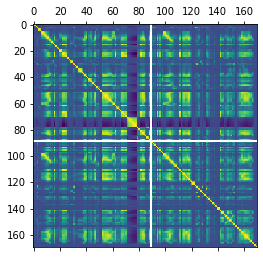

In [170]:
plt.matshow(df_test_mean.corr())

### 1. (b) iv

In [171]:
npa1 = df_train_mean.iloc[:,1:]
npa = npa1.values
cv =  lambda x: np.var(x) / np.mean(x)
var = np.apply_along_axis(cv, axis=0, arr=npa)
col=npa1.columns.values
colvar=pd.DataFrame(np.column_stack([col, var]))
print("Coeficients of all the coloumns Except the variable named 'class'")
print(colvar)

Coeficients of all the coloumns Except the variable named 'class'
          0            1
0    aa_000       356434
1    ab_000      3.86645
2    ac_000  1.67605e+09
3    ad_000  6.44286e+09
4    ae_000       3667.4
..      ...          ...
165  ee_007  8.52722e+06
166  ee_008  1.44018e+06
167  ee_009       265613
168  ef_000      201.151
169  eg_000      349.885

[170 rows x 2 columns]


In [172]:
sorte = colvar.sort_values(1, ascending=False)
highvar11= sorte.head(int(math.floor(math.sqrt(170))))
#selcol = df_[highvar11[0]]
#selcol
print("Selected highest 13 variables")
highvar11

Selected highest 13 variables


,0,1
91,cf_000,6.45637e+09
109,co_000,6.44641e+09
3,ad_000,6.44286e+09
145,dq_000,2.00278e+09
2,ac_000,1.67605e+09
155,eb_000,1.75487e+08
136,dh_000,6.22338e+07
122,cs_009,4.31322e+07
140,dl_000,3.925e+07
149,du_000,3.1471e+07


In [173]:
Class=df_train_mean.iloc[:,0:1]
selcol = npa1[highvar11[0]]
selcol=pd.concat([selcol, Class], axis=1)
selcol

,cf_000,co_000,ad_000,dq_000,ac_000,eb_000,dh_000,cs_009,dl_000,du_000,ay_001,bb_000,bu_000,class
0,2.000000,220.000000,280.000000,0.0,2.130706e+09,2801180.0,0.0,0.0,0.0,14745580.0,0.0,6700214.0,6700214.0,neg
1,190221.810984,190515.566938,190620.639314,0.0,0.000000e+00,3477820.0,0.0,0.0,0.0,4510080.0,0.0,3646660.0,3646660.0,neg
2,0.000000,0.000000,100.000000,0.0,2.280000e+02,1040120.0,0.0,0.0,0.0,300240.0,0.0,2673338.0,2673338.0,neg
3,2.000000,2.000000,66.000000,2014.0,7.000000e+01,0.0,0.0,0.0,0.0,15740.0,0.0,21614.0,21614.0,neg
4,0.000000,202.000000,458.000000,0.0,1.368000e+03,21173050.0,0.0,0.0,0.0,457040.0,0.0,4289260.0,4289260.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.000000,224.000000,186.000000,0.0,6.640000e+02,80125300.0,0.0,0.0,0.0,470800.0,0.0,10845228.0,10845228.0,neg
59996,2.000000,0.000000,224.000000,0.0,2.130707e+09,1285980.0,0.0,0.0,0.0,823720.0,0.0,147638.0,147638.0,neg
59997,2.000000,0.000000,18.000000,4544.0,2.130706e+09,0.0,0.0,0.0,0.0,7920.0,0.0,43738.0,43738.0,neg
59998,2.000000,580.000000,494.000000,0.0,2.130706e+09,39881280.0,190.0,0.0,0.0,25232340.0,0.0,6159728.0,6159728.0,neg


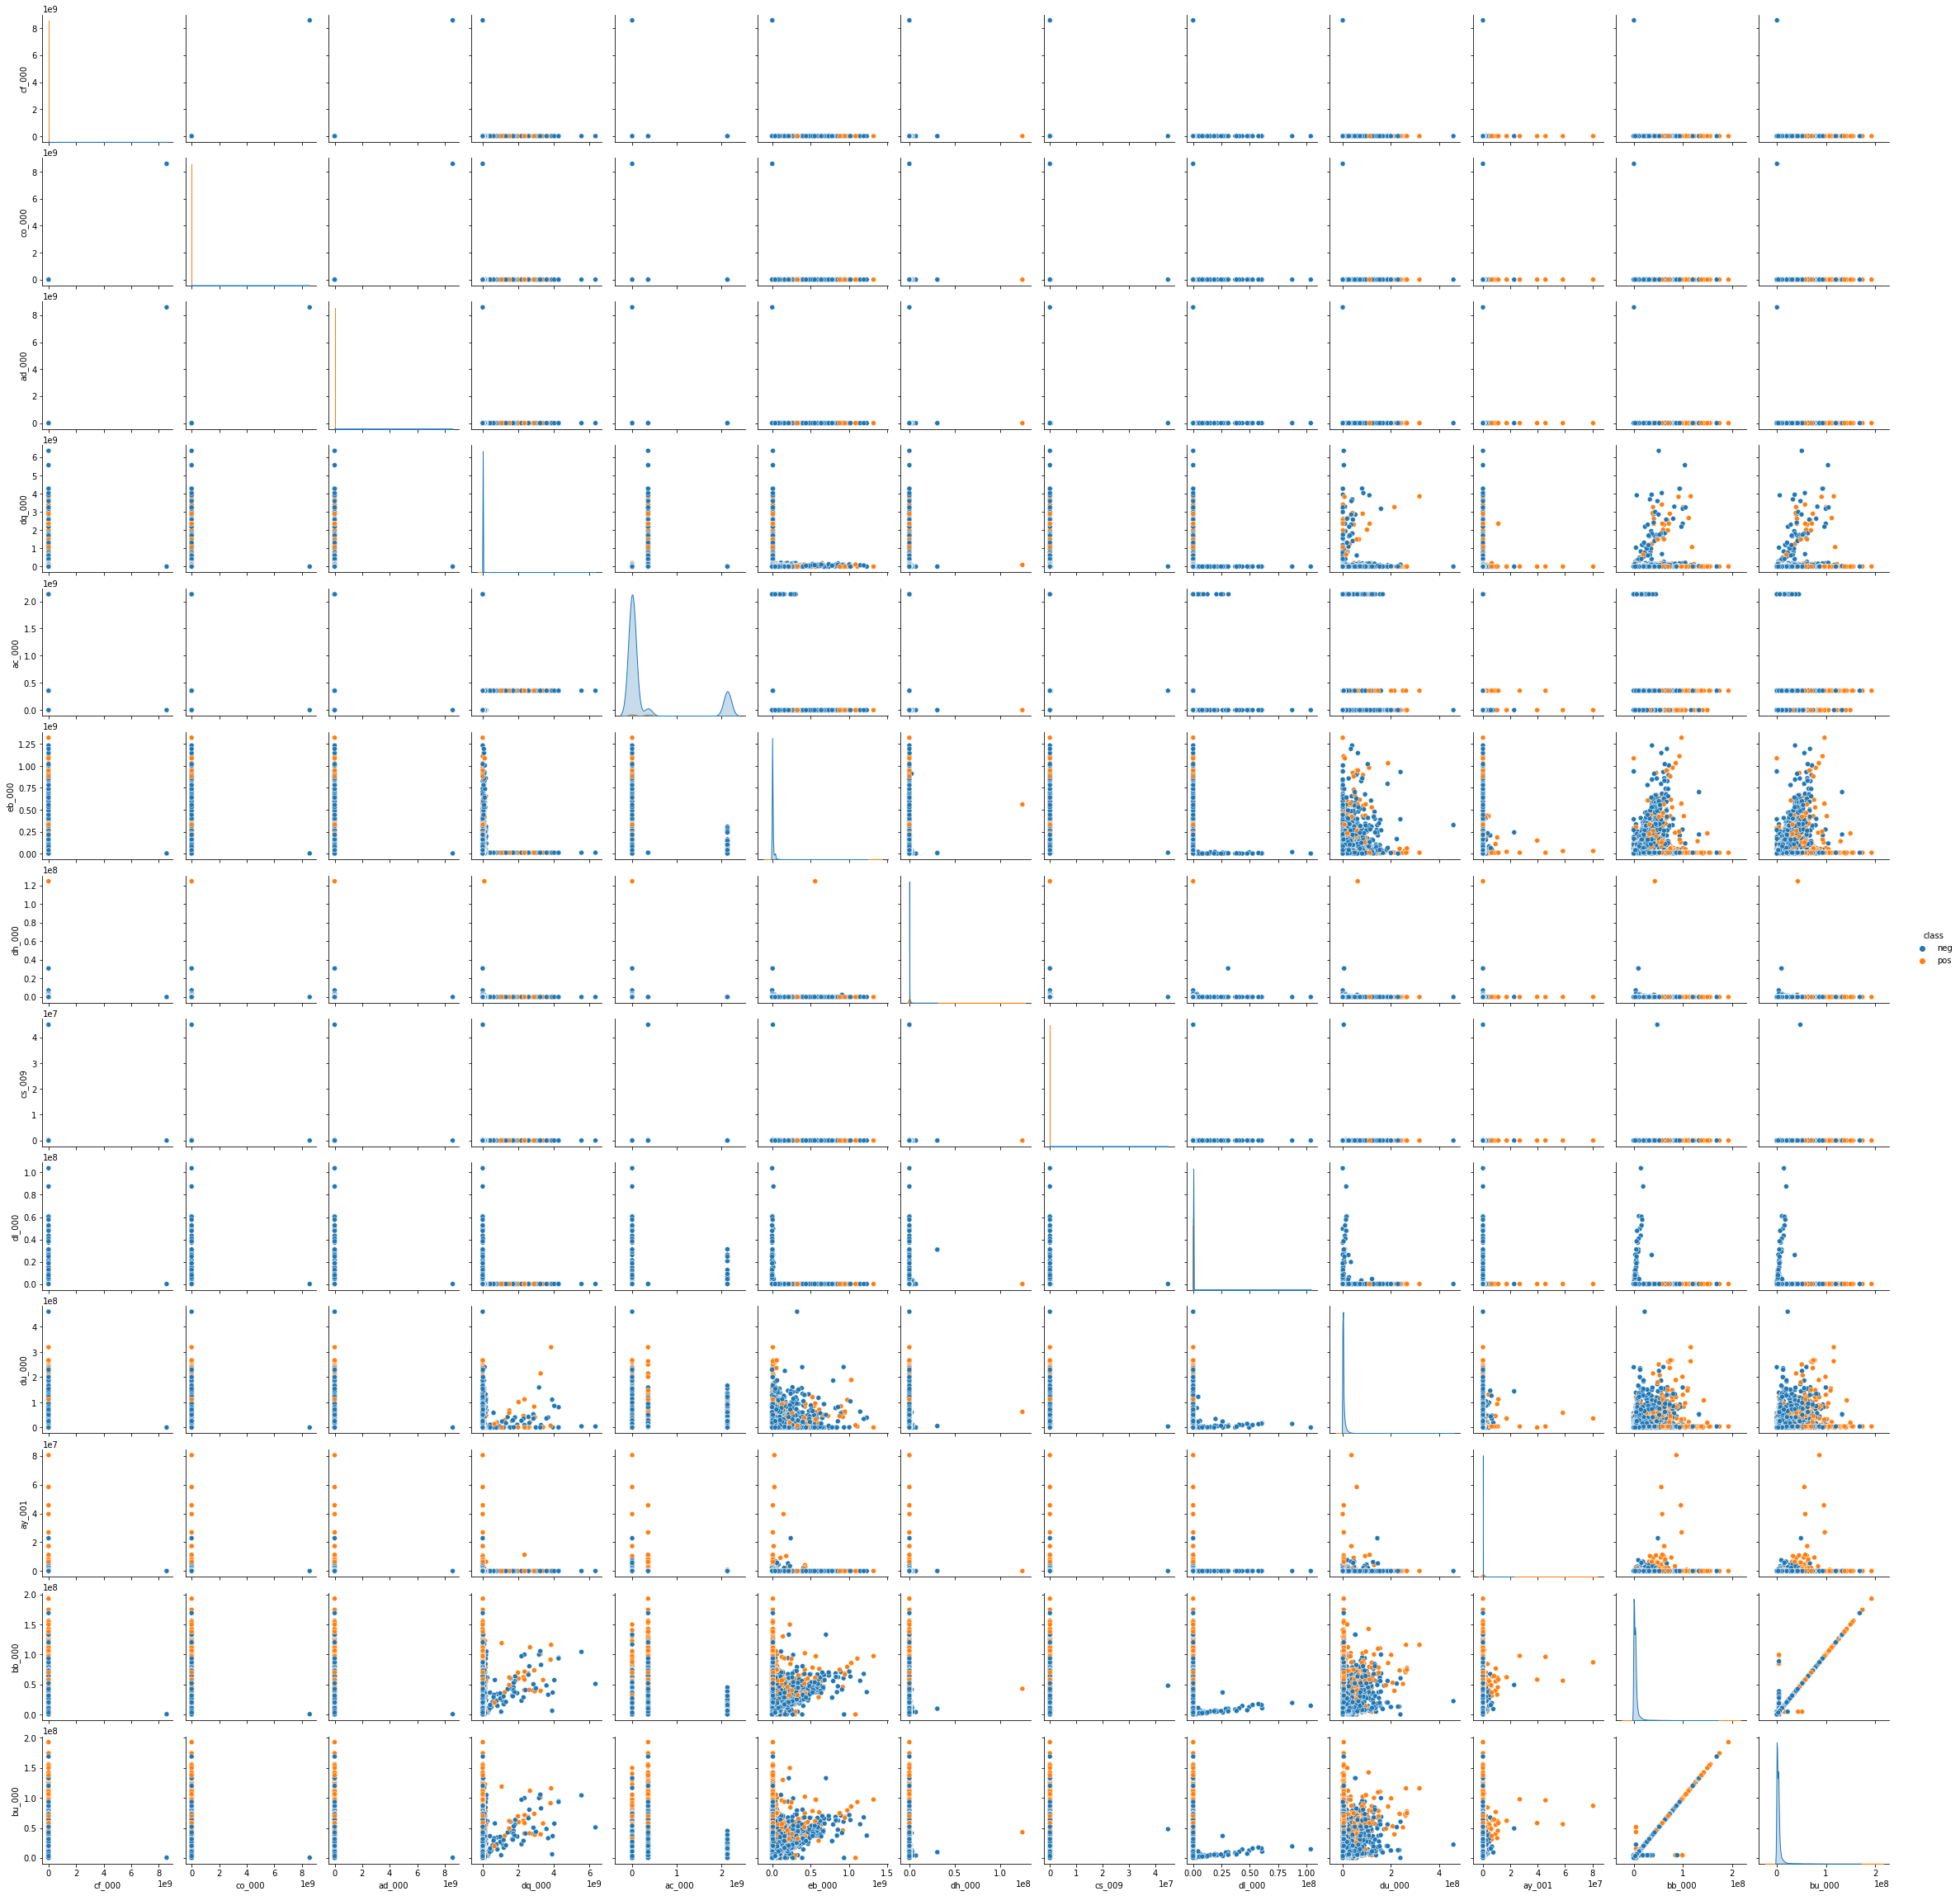

In [174]:
sns.pairplot(selcol,hue='class')

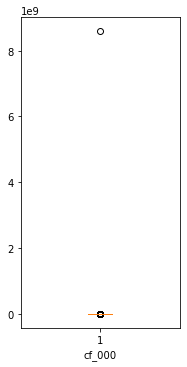

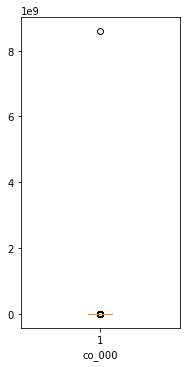

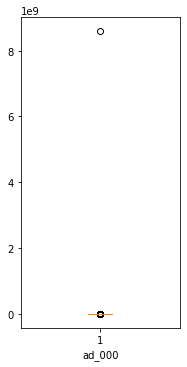

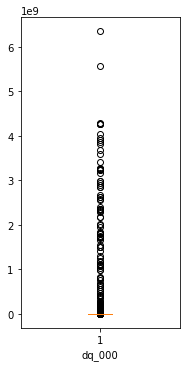

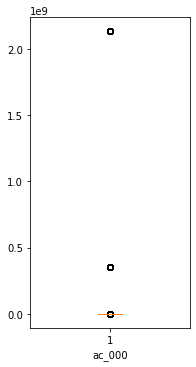

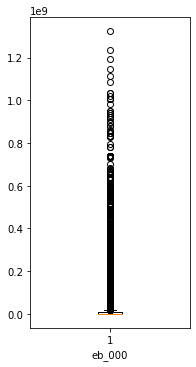

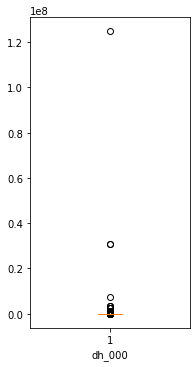

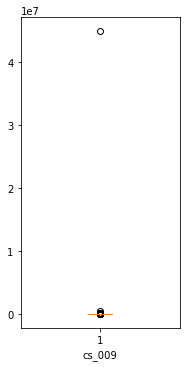

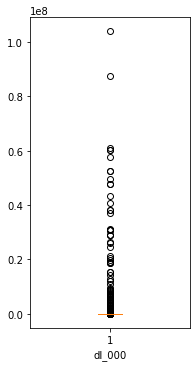

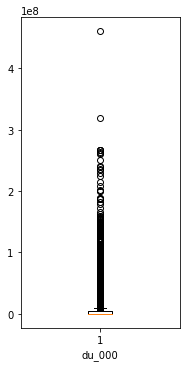

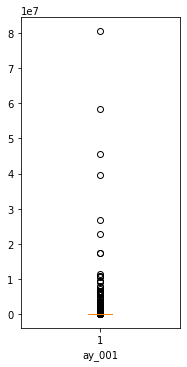

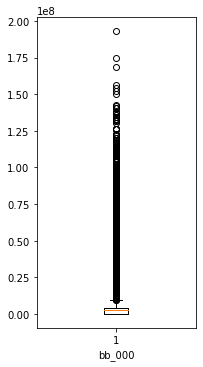

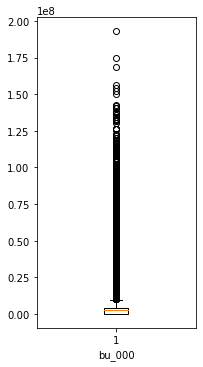

In [175]:
selcol = npa1[highvar11[0]]

box = selcol.columns
i=1
for eachcol in box:
    plt.subplots(figsize=(20, 40))
    plt.subplot(6,6,i)
    plt.xlabel(eachcol)
    plt.boxplot(selcol[eachcol])
    i=i+1

### i.(b) v

In [176]:
print(df_train_mean['class'].value_counts())


neg    59000
pos     1000
Name: class, dtype: int64


### 1.(c)

In [177]:
#Unbalanced
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

randomforest_train_mean = df_train_mean
randomforest_test_mean = df_test_mean
randomforest_train_mean_x = randomforest_train_mean.iloc[:,1:]
randomforest_train_mean_y= randomforest_train_mean.iloc[:,0:1]
randomforest_test_mean_x = randomforest_test_mean.iloc[:,1:]
randomforest_test_mean_y= randomforest_test_mean.iloc[:,0:1]


clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0,oob_score=True)


clf.fit(randomforest_train_mean_x,randomforest_train_mean_y.values.ravel())

rand_prd_y = clf.predict(randomforest_test_mean_x)


conf= confusion_matrix(randomforest_test_mean_y,rand_prd_y)
print(conf)


randomforest_test_mean_y_bin =randomforest_test_mean_y
#randomforest_test_mean_y_bin['class'] = pd.factorize(randomforest_test_mean_y_bin['class'])[0] + 1
lb = preprocessing.LabelBinarizer()
randomforest_test_mean_y_bin =lb.fit_transform(randomforest_test_mean_y_bin)
randomforest_test_mean_y_bin =pd.DataFrame(randomforest_test_mean_y_bin)
randomforest_test_mean_y_bin.rename(columns={0:'class'},inplace=True)
rand_prd_y_bin =pd.DataFrame(rand_prd_y)
rand_prd_y_bin.rename(columns={0:'class'},inplace=True)
rand_prd_y_bin=lb.fit_transform(rand_prd_y_bin)
rand_prd_y_bin =pd.DataFrame(rand_prd_y_bin)
rand_prd_y_bin.rename(columns={0:'class'},inplace=True)
randomforest_test_mean_y_bin




[[15624     1]
 [  304    71]]


,class
0,0
1,0
2,0
3,0
4,0
...,...
15995,0
15996,0
15997,0
15998,0


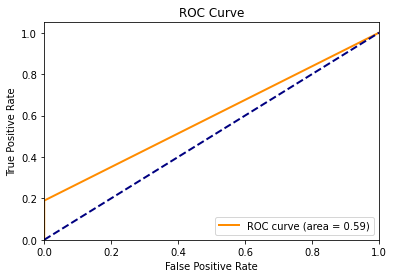

In [178]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(randomforest_test_mean_y_bin,rand_prd_y_bin)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [179]:
oob_error = 1 - clf.oob_score_
print('oob score ', oob_error)
print('test set misclassification error', 1 - (float(conf[0][0]+conf[1][1])/float(conf[0][0]+conf[1][1]+conf[0][1]+conf[1][0])))

oob score  0.014100000000000001
test set misclassification error 0.019062499999999982


### 1.(d)

In [180]:
# balanced
randomforest_train_mean = df_train_mean
randomforest_test_mean = df_test_mean
randomforest_train_mean_x = randomforest_train_mean.iloc[:,1:]
randomforest_train_mean_y= randomforest_train_mean.iloc[:,0:1]
randomforest_test_mean_x = randomforest_test_mean.iloc[:,1:]
randomforest_test_mean_y= randomforest_test_mean.iloc[:,0:1]


clf1 = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0,oob_score=True,class_weight="balanced_subsample")

clf1.fit(randomforest_train_mean_x,randomforest_train_mean_y.values.ravel())

rand_prd_y = clf1.predict(randomforest_test_mean_x)


conf1 = confusion_matrix(randomforest_test_mean_y,rand_prd_y)
print(conf1)
randomforest_test_mean_y_bin =randomforest_test_mean_y
#randomforest_test_mean_y_bin['class'] = pd.factorize(randomforest_test_mean_y_bin['class'])[0] + 1
lb = preprocessing.LabelBinarizer()
randomforest_test_mean_y_bin =lb.fit_transform(randomforest_test_mean_y_bin)
randomforest_test_mean_y_bin =pd.DataFrame(randomforest_test_mean_y_bin)
randomforest_test_mean_y_bin.rename(columns={0:'class'},inplace=True)
rand_prd_y_bin =pd.DataFrame(rand_prd_y)
rand_prd_y_bin.rename(columns={0:'class'},inplace=True)
rand_prd_y_bin=lb.fit_transform(rand_prd_y_bin)
rand_prd_y_bin =pd.DataFrame(rand_prd_y_bin)
rand_prd_y_bin.rename(columns={0:'class'},inplace=True)
randomforest_test_mean_y_bin




[[14668   957]
 [   12   363]]


,class
0,0
1,0
2,0
3,0
4,0
...,...
15995,0
15996,0
15997,0
15998,0


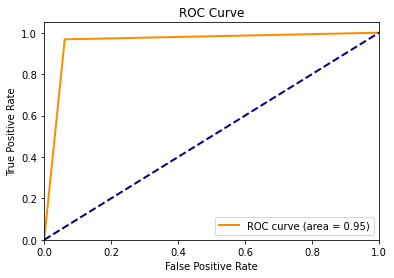

In [181]:
fpr, tpr, _ = roc_curve(randomforest_test_mean_y_bin,rand_prd_y_bin)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [182]:
oob_error = 1 - clf1.oob_score_
print('oob score ', oob_error)
print('test set misclassification error', 1 - (float(conf1[0][0]+conf1[1][1])/float(conf1[0][0]+conf1[1][1]+conf1[0][1]+conf1[1][0])))

oob score  0.06468333333333331
test set misclassification error 0.060562499999999964


### 1.(e)

In [183]:
test_params

{'reg_alphas': [0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0]}

In [184]:
XGBoost_train_mean = df_train_mean.replace(to_replace=['neg', 'pos'], value=[0, 1])
XGBoost_test_mean = df_test_mean.replace(to_replace=['neg', 'pos'], value=[0, 1])

XBtrain_X = XGBoost_train_mean.iloc[:,1:]
XBtrain_y= XGBoost_train_mean.iloc[:,0:1]
XBtest_X = XGBoost_test_mean.iloc[:,1:]
XBtest_y= XGBoost_test_mean.iloc[:,0:1]

xgc=xgb.XGBClassifier(object='binary:logistic',reg_lambda=0)

test_params={
    'reg_alphas':np.linspace(0,1,num=6).tolist()
}
#test_params
xgc_cv=GridSearchCV(estimator=xgc,param_grid={'reg_alphas':[0.0, 0.2, 0.4, 0.6, 0.8, 1.0],'kernel': ('linear', 'rbf')},cv=StratifiedKFold(shuffle=True,random_state=24))
xgc_cv
xgc_cv.fit(XBtrain_X,XBtrain_y)
print(xgc_cv.best_params_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[10:48:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { kernel, object, reg_alphas } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:49:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { kernel, object, reg_alphas } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:49:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { kernel, object, reg_alphas } might not be used.

  This may not be accura

[10:59:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { kernel, object, reg_alphas } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:00:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { kernel, object, reg_alphas } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:01:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { kernel, object, reg_alphas } might not be used.

  This may not be accura

[11:14:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { kernel, object, reg_alphas } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:15:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { kernel, object, reg_alphas } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:16:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { kernel, object, reg_alphas } might not be used.

  This may not be accura

In [185]:
from sklearn.metrics import confusion_matrix
confusion_matrix(XBtrain_y,xgc_cv.predict(XBtrain_X))


array([[59000,     0],
       [    1,   999]])

In [186]:
y_train_pred=xgc_cv.predict(XBtrain_X)
y_train_pred_proba=xgc_cv.predict_proba(XBtrain_X)[::,1]

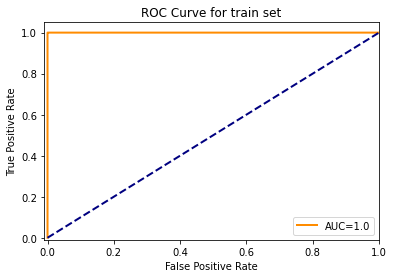

In [187]:
fpr, tpr, thresholds = metrics.roc_curve(XBtrain_y,y_train_pred_proba)
auc = metrics.roc_auc_score(XBtrain_y, y_train_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label="AUC="+str(round(auc,6)))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for train set')
plt.legend(loc="lower right")
plt.show()

In [188]:
confusion_matrix(XBtest_y,xgc_cv.predict(XBtest_X))


array([[15609,    16],
       [   87,   288]])

In [189]:
y_test_pred=xgc_cv.predict(XBtest_X)
y_test_pred_proba=xgc_cv.predict_proba(XBtest_X)[::,1]

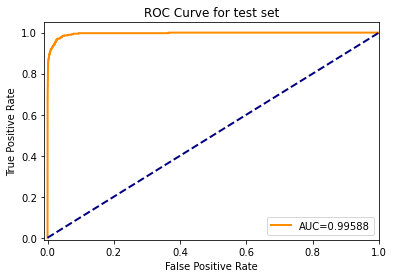

In [190]:
fpr, tpr, thresholds = metrics.roc_curve(XBtest_y,y_test_pred_proba)
auc = metrics.roc_auc_score(XBtest_y, y_test_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label="AUC="+str(round(auc,6)))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for test set')
plt.legend(loc="lower right")
plt.show()

In [191]:
err_type=['train','test']
err_list=[1-xgc_cv.score(XBtrain_X,XBtrain_y),1-xgc_cv.score(XBtest_X,XBtest_y)]
pd.DataFrame().assign(error_type=err_type,value=err_list)

,error_type,value
0,train,0.000017
1,test,0.006437


### 1.(f)

In [192]:
from imblearn.over_sampling import SMOTE

df_train_smote = df_train_mean
smote = SMOTE(random_state=0,sampling_strategy=0.5)
a = smote.fit_sample(df_train_smote[df_train_smote.columns[df_train_smote.columns!='class']], df_train_smote['class'])
X = pd.DataFrame(a[0])
Y = pd.DataFrame(a[1],columns=['class'])
df_train_smote = pd.concat([X,Y],axis=1)

In [193]:
df_train_smote.shape

(88500, 171)

In [194]:
print(df_train_smote['class'].value_counts())


neg    59000
pos    29500
Name: class, dtype: int64


In [195]:
import collections
from imblearn.over_sampling import SMOTE

SMOTE_train_mean = df_train_mean.replace(to_replace=['neg', 'pos'], value=[0, 1])

SMOTE_test_mean = df_test_mean.replace(to_replace=['neg', 'pos'], value=[0, 1])



SMOTE_train_mean_x = SMOTE_train_mean.iloc[:,1:]
SMOTE_train_mean_y= SMOTE_train_mean.iloc[:,0:1]
SMOTE_test_mean_x = SMOTE_test_mean.iloc[:,1:]
SMOTE_test_mean_y= SMOTE_test_mean.iloc[:,0:1]

print ('Before oversampling:',collections.Counter(SMOTE_train_mean_y))

SMOTe=SMOTE()
X_train_smote,y_train_smote=SMOTe.fit_resample(SMOTE_train_mean_x,SMOTE_train_mean_y)

print ('After oversampling:',collections.Counter(y_train_smote))



Before oversampling: Counter({'class': 1})
After oversampling: Counter({'class': 1})


In [196]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

xgc=xgb.XGBClassifier(object='binary:logistic',reg_lambda=0)

test_params={
    'reg_alphas':np.linspace(0,1,num=6).tolist()
}
#test_params
xgc_cv=GridSearchCV(estimator=xgc,param_grid=test_params,cv=StratifiedKFold(shuffle=True,random_state=24))
xgc_cv.fit(X_train_smote,y_train_smote)
print(xgc_cv.best_params_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[11:28:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { object, reg_alphas } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:30:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { object, reg_alphas } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:31:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { object, reg_alphas } might not be used.

  This may not be accurate due to some parameter

[11:59:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { object, reg_alphas } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:01:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { object, reg_alphas } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:02:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { object, reg_alphas } might not be used.

  This may not be accurate due to some parameter

In [197]:

confusion_matrix(y_train_smote,xgc_cv.predict(X_train_smote))


array([[59000,     0],
       [    1, 58999]])

In [198]:
y_train_pred=xgc_cv.predict(X_train_smote)
y_train_pred_proba=xgc_cv.predict_proba(X_train_smote)[::,1]

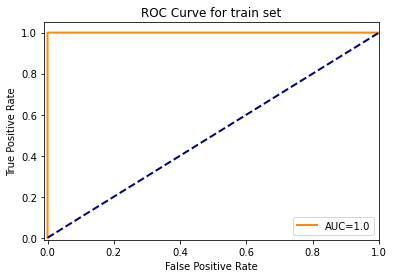

In [199]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = metrics.roc_curve(y_train_pred,y_train_pred_proba)
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label="AUC="+str(round(auc,6)))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for train set')
plt.legend(loc="lower right")
plt.show()

In [200]:
metrics.confusion_matrix(SMOTE_test_mean_y,xgc_cv.predict(SMOTE_test_mean_x))


array([[15431,   194],
       [   53,   322]])

In [201]:
y_test_pred=xgc_cv.predict(SMOTE_test_mean_x)
y_test_pred_proba=xgc_cv.predict_proba(SMOTE_test_mean_x)[::,1]

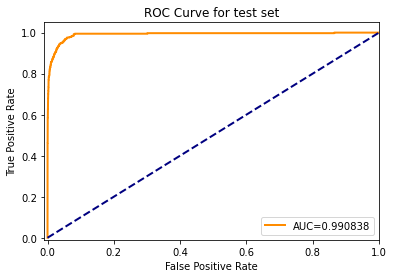

In [202]:
fpr, tpr, thresholds = metrics.roc_curve(SMOTE_test_mean_y,y_test_pred_proba)
auc = metrics.roc_auc_score(SMOTE_test_mean_y,y_test_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label="AUC="+str(round(auc,6)))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for test set')
plt.legend(loc="lower right")
plt.show()

In [203]:
err_type=['train','test']
err_list=[1-xgc_cv.score(X_train_smote,y_train_smote),1-xgc_cv.score(SMOTE_test_mean_x,SMOTE_test_mean_y)]
pd.DataFrame().assign(error_type=err_type,value=err_list)

,error_type,value
0,train,0.000008
1,test,0.015437


### ISLR 6.6.3

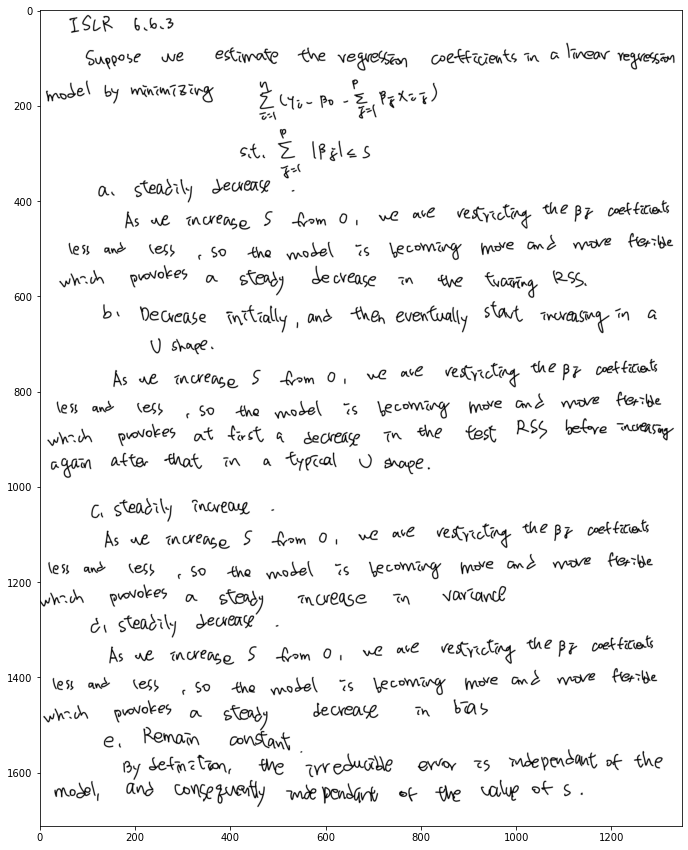

In [204]:
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
figure(figsize=(15, 15))
img = mpimg.imread('../data/ISLR6_6_3.png')
imgplot = plt.imshow(img)
plt.show()

### ISLR 6.6.5

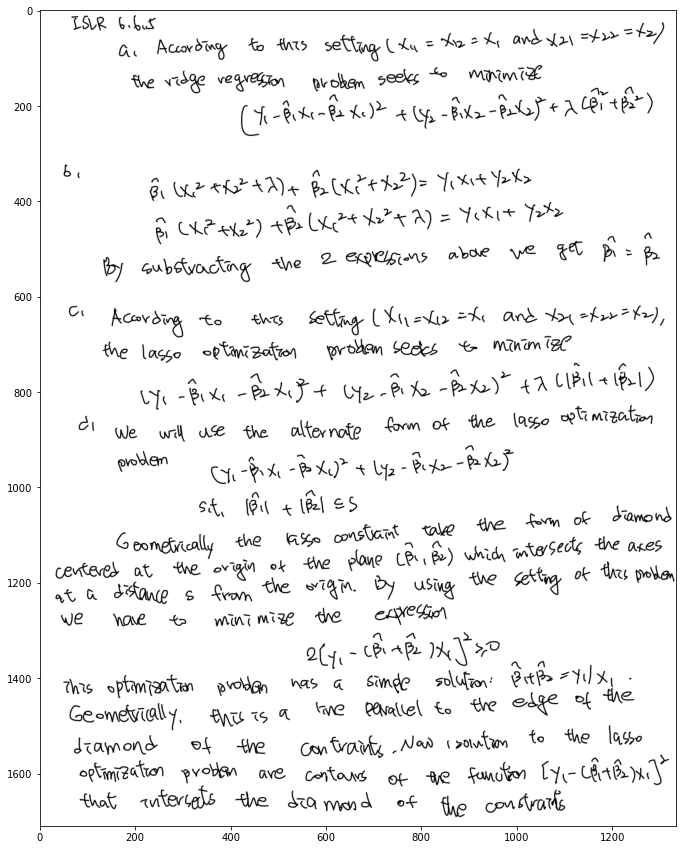

In [205]:
figure(figsize=(15, 15))
img_1 = mpimg.imread('../data/ISLR6_6_5-1.png')
imgplot = plt.imshow(img_1)
plt.show()

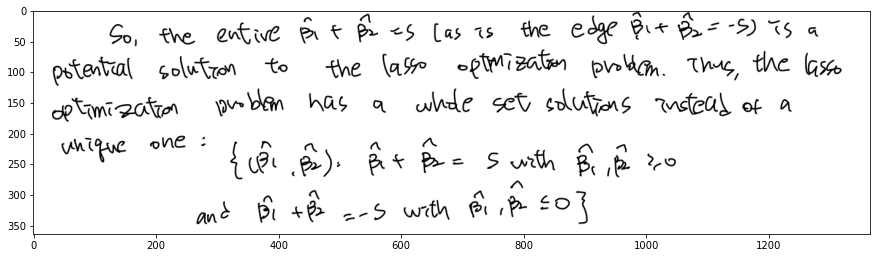

In [206]:
figure(figsize=(15, 15))
img_2 = mpimg.imread('../data/ISLR6_6_5-2.png')
imgplot = plt.imshow(img_2)


### ISLR 8.4.5

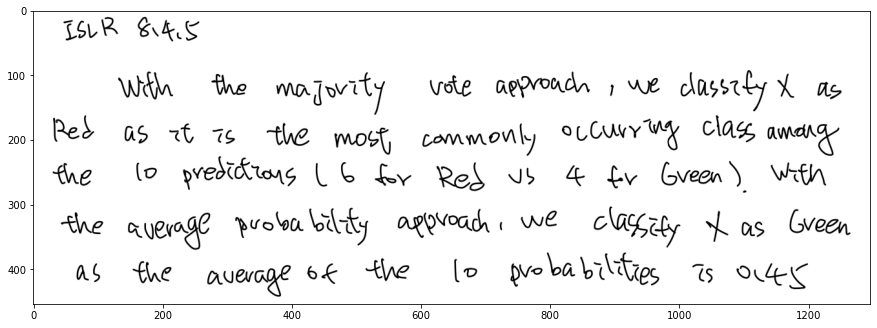

In [207]:
figure(figsize=(15, 15))
img = mpimg.imread('../data/ISLR8_4_5.png')
imgplot = plt.imshow(img)
plt.show()

### ISLR 9.7.3

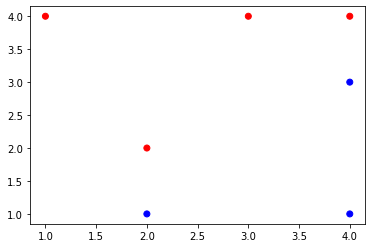

In [208]:
# (a)
from sklearn import svm

X = [[3, 2, 4, 1, 2, 4, 4], [4, 2, 4, 4, 1, 3, 1]]
Y = ['r', 'r', 'r', 'r', 'b', 'b', 'b']

plt.scatter(X[0], X[1], c=['r', 'r', 'r', 'r', 'b', 'b', 'b'])


##### (a) Ans: As shown above

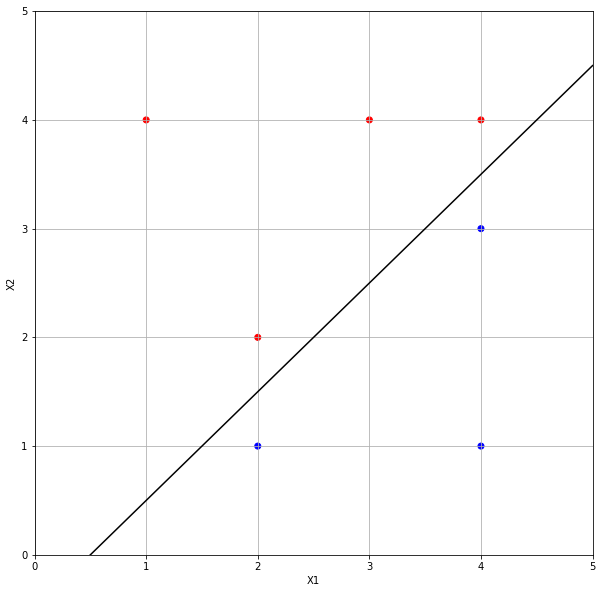

In [209]:
#(b)
clf = svm.SVC(kernel='linear', C=100)
clf.fit(np.array(X).T.tolist(), Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)


plt.scatter(X[0], X[1], c=['r', 'r', 'r', 'r', 'b', 'b', 'b'])
plt.plot(xx, yy, 'k-')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.grid()
plt.show()

##### (b) Ans: As shown in the plot, the optimal separating hyperplane has to be between the observations (2,1) and (2,2), and between the observations (4,3) and (4,4). So it is a line that passes through the points (2,1.5) and (4,3.5) which equation is X1−X2−0.5=0.

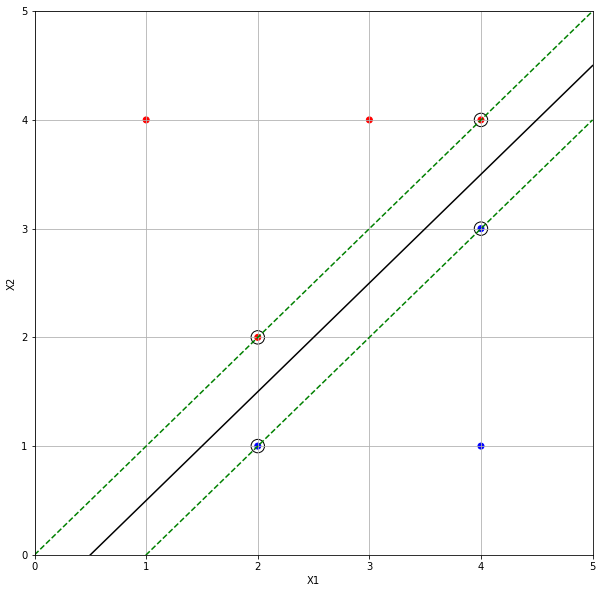

In [210]:
# (c) (d)

clf = svm.SVC(kernel='linear', C=100)
clf.fit(np.array(X).T.tolist(), Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')
plt.scatter(X[0], X[1], c=['r', 'r', 'r', 'r', 'b', 'b', 'b'])
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--', color='g')
plt.plot(xx, yy_up, 'k--', color='g')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.grid()
plt.show()

##### (c) Ans : The classification rule is “Classify to Red if X1−X2−0.5<0, and classify to Blue otherwise.”

##### (d) Ans: The margin is here equal to 1/4.

##### (e) Ans: The support vectors are the points (2,1), (2,2), (4,3) and (4,4).





##### (f) Ans: By examining the plot, it is clear that if we moved the observation (4,1), we would not change the maximal margin hyperplane as it is not a support vector.

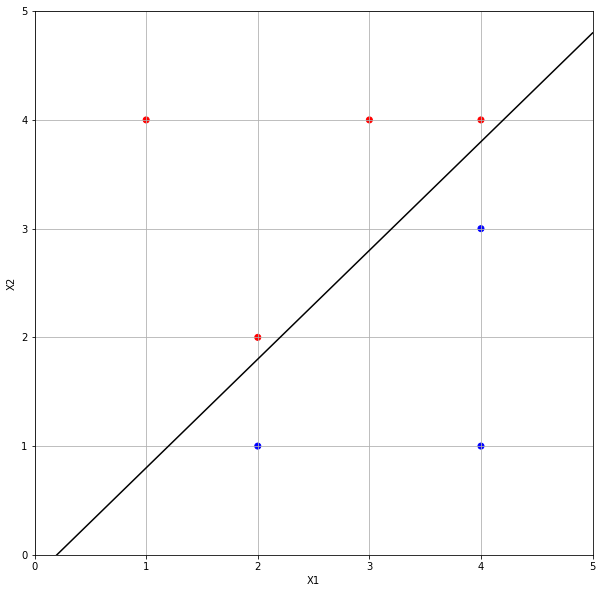

In [211]:
# (g)

clf = svm.SVC(kernel='linear', C=100)
clf.fit(np.array(X).T.tolist(), Y)

yy =  xx -0.2

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plt.scatter(X[0], X[1], c=['r', 'r', 'r', 'r', 'b', 'b', 'b'])
plt.plot(xx, yy, 'k-')


ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.grid()
plt.show()

#### (g) Ans: The hyperplane which equation is X1−X2−0.2=0 is not the optimal separating hyperplane.

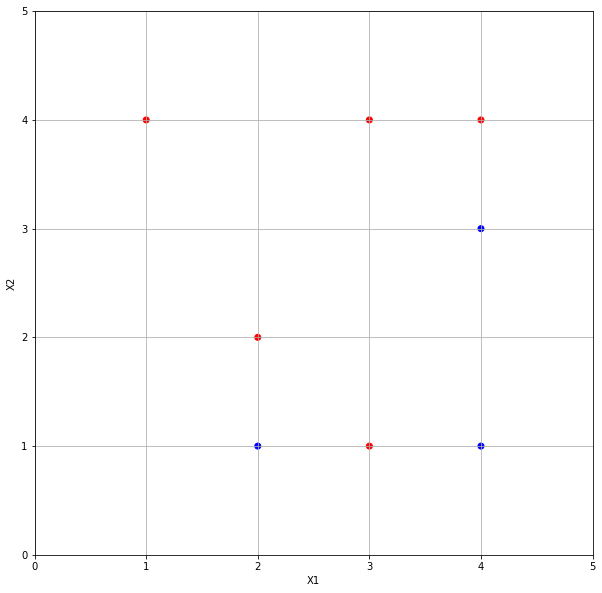

In [212]:
# (h)


X = [[3, 2, 4, 1, 2, 4, 4, 3], [4, 2, 4, 4, 1, 3, 1, 1]]
Y = ['r', 'r', 'r', 'r', 'b', 'b', 'b','r']
#yy =  xx -0.2

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plt.scatter(X[0], X[1], c=['r', 'r', 'r', 'r', 'b', 'b', 'b','r'])


ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.grid()
plt.show()

#### (h) Ans: When the red point (3,1) is added to the plot, the two classes are obviously not separable by a hyperplane anymore.